In [1]:
import numpy as np
import matplotlib.pyplot as plt

#**3.1. Simulating Brownian motion using increments**

In [2]:
def brownian(interval, step):
  n = int(interval / step)
  B = [0]
  for i in range(n):
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
  return B

In [3]:
B = []
for i in range(100):
  B.append(brownian(1, 0.01))

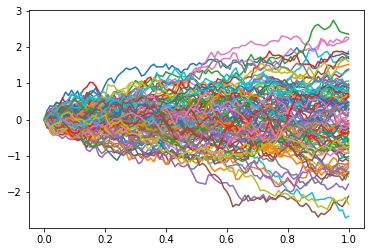

In [4]:
x = np.linspace(0.0, 1.0, 101)
for i in range(100):
  plt.plot(x, B[i])

#**3.2. Simulating the Poisson process**

In [5]:
def poisson(interval, step):
  n = int(interval / step)
  N = [0]
  for i in range(n):
    N.append(np.random.poisson(1 * step) + N[-1])
  return N

In [6]:
N = []
for i in range(5):
  N.append(poisson(10, 0.1))

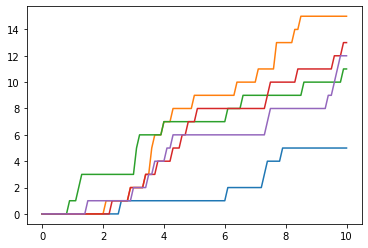

In [7]:
x = np.linspace(0.0, 10.0, 101)
for i in range(5):
  plt.plot(x, N[i])

#**3.3. The arcsine law**

1000


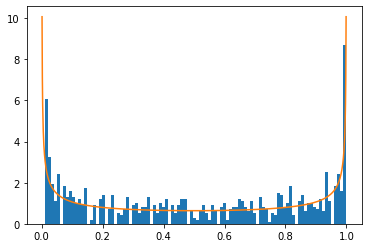

In [9]:
B = []
for i in range(1000):
  B.append(brownian(1, 0.01))
print(len(B))
T = np.sum(np.array(B) >= 0, axis=1) / 101
n, bins, patches = plt.hist(T, 100, density=True)
x = np.linspace(0.001, 0.999, 999)
y = 1 / (np.sqrt(x * (1-x)) * np.pi)
plt.plot(x, y)

A lot of Brownian motions that start by increasing (resp. decreasiing ) tend to continue on theat path

#**3.4. Arcsine law for Ornstein-Uhlenbeck**

In [10]:
#The Ornstein-Uhlenbeck process from Numerical Project 2.3.
C2 = np.zeros((100, 100))
for s in range(100):
  for t in range(100):
    s1 = (s+1)/100
    t1 = (t+1)/100
    if s<t :
      C2[s][t] = np.exp(-2 * (t1-s1)) * (1-np.exp(-2*s1)) * 0.5
    else:
      C2[s][t] = np.exp(-2 * (s1-t1)) * (1-np.exp(-2*t1)) * 0.5
A2 = np.linalg.cholesky(C2)
def stand_gauss(N):
  return np.random.standard_normal((N, 100))
X2 = stand_gauss(100)
B2 = np.dot(A2, X2)
Zero = np.zeros((1,100))
B2 = np.vstack([Zero, B2])
B2 = np.transpose(B2)
B2

array([[ 0.        , -0.04295497, -0.052536  , ...,  0.05440509,
         0.02345702,  0.10385474],
       [ 0.        ,  0.04932938,  0.15025954, ...,  0.40685425,
         0.38292436,  0.38559361],
       [ 0.        , -0.13788491, -0.18185088, ..., -1.28887157,
        -1.52459119, -1.59605454],
       ...,
       [ 0.        ,  0.01058615,  0.06728252, ..., -0.81269991,
        -0.75151224, -0.7873509 ],
       [ 0.        ,  0.09169954, -0.10976937, ..., -0.56292719,
        -0.5796805 , -0.6128258 ],
       [ 0.        ,  0.08781739,  0.1270683 , ...,  0.45134254,
         0.37907788,  0.46774946]])

[0.41584158 0.91089109 0.00990099 0.42574257 0.41584158 0.2970297
 0.7029703  0.77227723 0.8019802  0.91089109 0.48514851 0.24752475
 0.08910891 0.24752475 0.65346535 0.46534653 0.68316832 0.74257426
 0.56435644 0.30693069 0.02970297 0.5049505  0.35643564 0.34653465
 0.61386139 0.89108911 0.69306931 0.08910891 0.05940594 0.64356436
 0.26732673 0.6039604  0.25742574 0.52475248 0.57425743 0.17821782
 0.55445545 1.         0.37623762 0.53465347 0.93069307 0.22772277
 0.79207921 0.57425743 0.74257426 0.48514851 0.62376238 0.62376238
 0.37623762 0.55445545 0.00990099 0.00990099 0.82178218 0.17821782
 0.84158416 0.61386139 0.69306931 0.69306931 0.42574257 0.22772277
 0.57425743 0.71287129 0.56435644 0.42574257 0.87128713 0.26732673
 0.74257426 0.63366337 0.64356436 0.89108911 0.28712871 0.3960396
 0.38613861 0.08910891 0.93069307 0.99009901 0.27722772 0.30693069
 0.04950495 0.93069307 0.53465347 0.02970297 0.26732673 0.44554455
 0.12871287 0.65346535 0.74257426 0.95049505 0.63366337 0.841584

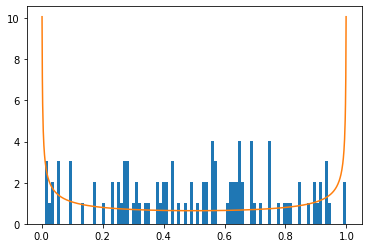

In [11]:
T = np.sum(B2 >= 0, axis=1) / 101
print(T)
n, bins, patches = plt.hist(T, 100, density=True)
x = np.linspace(0.001, 0.999, 999)
y = 1 / (np.sqrt(x * (1-x)) * np.pi)
plt.plot(x, y)

The arcsine law does not apply on the Ornstein-Uhlenbeck paths.

#**3.5. Brownian variations**

In [12]:
B = brownian(1, 2e-8)

In [13]:
def variation(n):
  Bn = np.array(B[::2**(8-n)])
  B1 = Bn[1:]
  B2 = Bn[:-1]
  V = np.abs(B1 - B2)
  return np.sum(V)

498.5619785872655
704.8125917967852
996.4685197729132
1410.4601011416082
1994.2340519640095
2820.381549031122
3988.9464551685423
5640.7441530013975


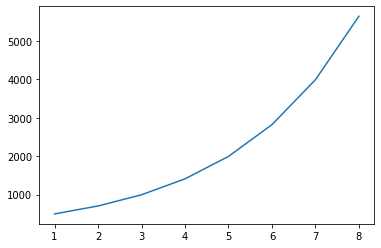

In [14]:
x = np.linspace(1.0, 8.0, 8)
V = []
for i in range(1,9):
  Vi = variation(i)
  print(Vi)
  V.append(Vi)
plt.plot(x, V)

In [15]:
def quad_variation(n):
  Bn = np.array(B[::2**(8-n)])
  B1 = Bn[1:]
  B2 = Bn[:-1]
  V = np.square(B1 - B2)
  return np.sum(V)

1.0006623506179109
0.9985944505373922
0.9986709645024773
0.9996170603093013
0.9998544213807704
0.9997327061230631
0.9997978340368061
0.9996156087220923


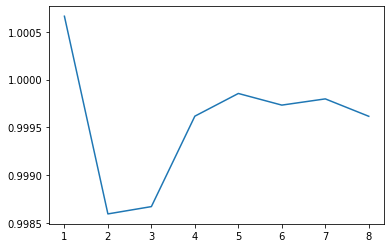

In [16]:
x = np.linspace(1.0, 8.0, 8)
V = []
for i in range(1,9):
  Vi = quad_variation(i)
  print(Vi)
  V.append(Vi)
plt.plot(x, V)

#**3.6. Simulating Brownian motion using Lévy's construction**

In [110]:
def A(t):
  if 0<=t and t<=0.5 :
    return t
  elif 0.5<=t and t<=1 :
    return (1-t)
  else :
    return 0

In [59]:
def decomp(n):
  n1 = n
  j=0
  while 1<n1 :
    j += 1
    n1 = n1//2
  k = n - 2**j
  return j, k

In [120]:
def brownian_levy(N):
  Z = np.random.standard_normal(N+1)
  B = [0]
  for i in range(100):
    t = (i+1)/100
    Bt = t * Z[0]
    for n in range(1, N+1):
      j, k = decomp(n)
      Bt = Bt + ((2**(j/2)) * A((t * (2**j)) - k) * Z[n])
    B.append(Bt)
  return B

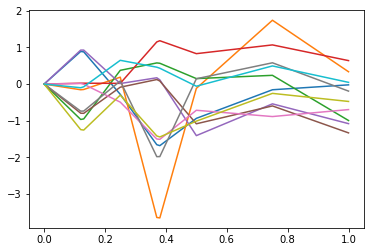

In [121]:
x = np.linspace(0.0, 1.0, 101)
for i in range(10):
  B5 = brownian_levy(5)
  plt.plot(x, B5)

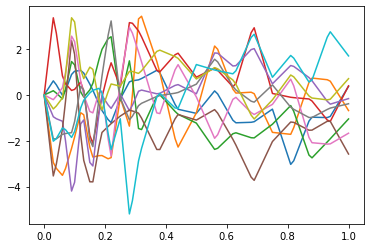

In [122]:
x = np.linspace(0.0, 1.0, 101)
for i in range(10):
  B20 = brownian_levy(20)
  plt.plot(x, B20)

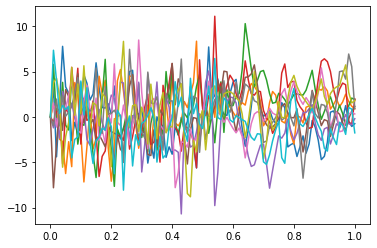

In [126]:
x = np.linspace(0.0, 1.0, 101)
for i in range(10):
  B100 = brownian_levy(100)
  plt.plot(x, B100)